## Experiment Introduction

### Experimental Background

There is a large amount of information in images, which usually requires a lot of language to describe clearly. Among many processing images, classifying them will be the most essential task. In this experiment, we will use convolutional neural network to identify flowers in a real environment, and we will use Keras (backend tensorflow), a deep learning framework, to build a convolutional neural network model to solve the image classification problem.
For the dataset, the pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion. Photos are not high resolution, about 320x240 pixels. Photos are not reduced to a single size, they Photos are not reduced to a single size, they have different proportions.

### Experimental environment

- Huawei Modelarts platform
    - work environment:Multi-Engine 1.0
    - Instance Flavor:8 vCPUs | 32 GiB

1. Python 3.6.5
2. Tensorflow 1.13.1
3. Kears 2.2.4
- Matplotlib 3.2.2
- Numpy 1.18.5
- OpenCV 3.4.1

### Purpose of the experiment.

1. enhance the understanding of the process of building neural networks using Keras
- Explore the impact that unbalanced data can have
- Learn how to use mature models to make efficient use of existing datasets

**<font color='red'>Note: Don't worry if WARNING or UserWarning appears in the run results, it won't affect the results. </font>**


## import python packages

### Introduce relevant python packages and modules

All the functions needed for this experiment are already included here, allowing you to add your own

In [1]:
# layers include common network layers. 
# optimizers include common optimizers. 
# Sequential is used to construct a linear (from beginning to end) network structure.
# Model functional model, complex models can be constructed. 
from keras import layers, optimizers, Sequential, Model
# contains models commonly used for migration learning. 
from keras import applications# is used for image enhancement. 
from keras.preprocessing.image import ImageDataGenerator

# common packages: control files and folders. 
import glob
import os
# cv2 = opencv
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


Using TensorFlow backend.
D:\ProgramFile\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\ProgramFile\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\ProgramFile\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\ProgramFile\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

## Data reading and visualization

### Define parameters related to dataset reading

In [2]:
# Path of the dataset, which is used for training and verification.
path = './flower_photos/'
# Scale images. The size is 128*128*3(width * height * channals)
w, h, c = 128, 128, 3

# to ensure that the generated random numbers are predictable, that is, the same seed value. The generated random numbers are the same. 
# This parameter will be transferred to the random_state of function train_test_split.
seed = 785 


### Define the function read_img

Create a function that reads all the image data in a folder and resizes the images in a uniform format

**input**: function parameter 'path', as the path to the incoming folder

**output**: return data, label, flower_dict, image_list_for_plot
1. data, ndarray storing images, data.shape = (image_nums, w, h, c)
- label, store the label ndarray corresponding to images, label.shape = (image_nums,)
- flower_dict, stores a list of number-flower names, e.g. {0: 'daisy', 1: 'dandelion', 2: 'tulips'...}
- image_list_for_plot, a list of images to be used for visualization, with internal elements like (images, label_name), 45 images in total, 9 images for each type of flower.

**Hint**: you can use, os.listdir, glob.glob, cv2.resize, np.asarray and other methods.

**Note**: If you use cv2.imread() function to read the pictures, the color space of the pictures is 'BGR', you need to convert to 'RGB' to facilitate the visualization later.

In [3]:
def read_img(path):
    # Create an empty dictionary corresponding to the number-flower name
    flower_dict = {} 
    # Create a hierarchical list cate for traversing the data folder below the data storage directory, os.path.isdir is used to determine if the file is a directory
    cate = [path+x for x in os.listdir(path) if os.path.isdir(path+x)]
    # Create empty list for saving images, image tags
    imgs=[]
    labels=[]
    # Create empty list to hold information about images used for visualization
    image_list_for_plot=[]
    for idx,folder in enumerate(cate):                                 
        counter = 1
        flower_dict[idx] = folder.split('/')[-1]
        # Use the glob.glob function to search for images that match a specific format "/*.jpg" under each hierarchical file and iterate through them
        for im in glob.glob(folder+'/*.jpg'):                        
            img=cv2.imread(im)                                         
            img=cv2.resize(img,(w,h))                           
            imgs.append(img)                                           
            labels.append(idx)                                         
            if counter <= 9:
                image_list_for_plot.append((folder.split('/')[-1], cv2.cvtColor(img, cv2.COLOR_BGR2RGB)))
                counter+=1
    return np.asarray(imgs,np.float32),np.asarray(labels,np.int32),flower_dict, image_list_for_plot


In [4]:
data, label, flower_dict, image_list_for_plot=read_img(path)                                              
print("shape of data:",data.shape)                                      
print("shape of label:",label.shape)  
print(len(image_list_for_plot))

shape of data: (3373, 128, 128, 3)
shape of label: (3373,)
45


### Visualization

Iterate through the image_list_for_plot list and visualize the images in each category with matplotlib.pyplot

**Input**: image_list_for_plot

**output**: there are 9 images of each class, drawn on a canvas with 3\*3 subplots, 5 canvases in total 

**Hint**: you can use methods like plt.subplot or plt.subplots.



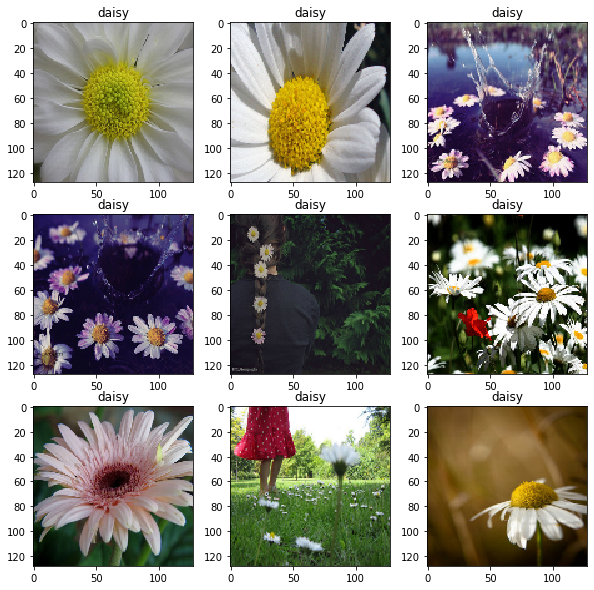

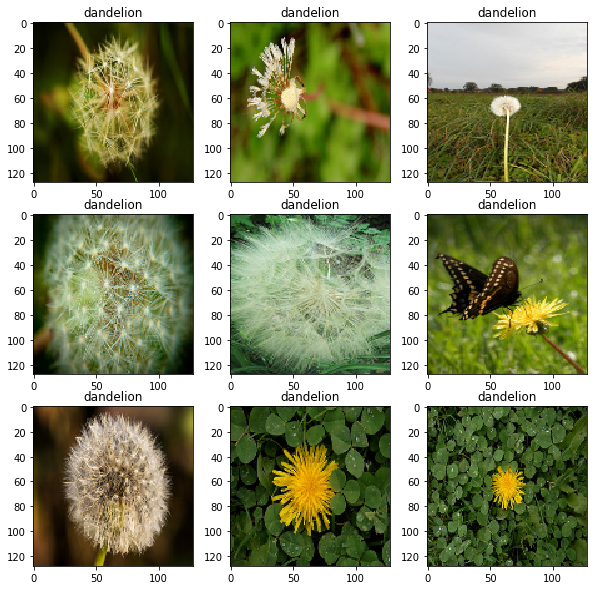

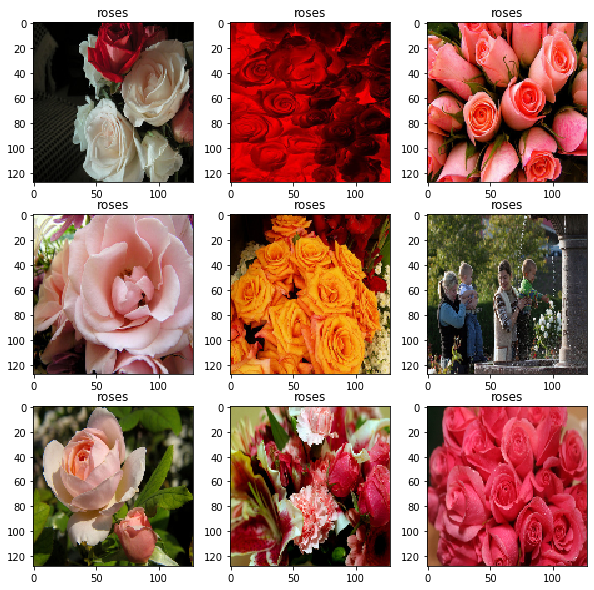

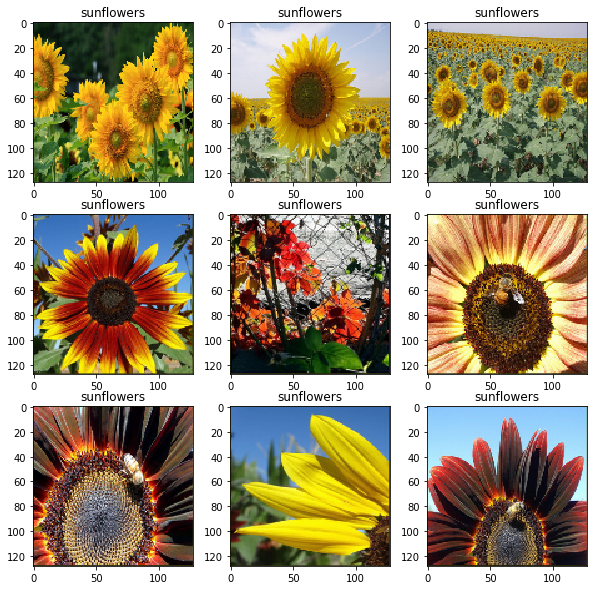

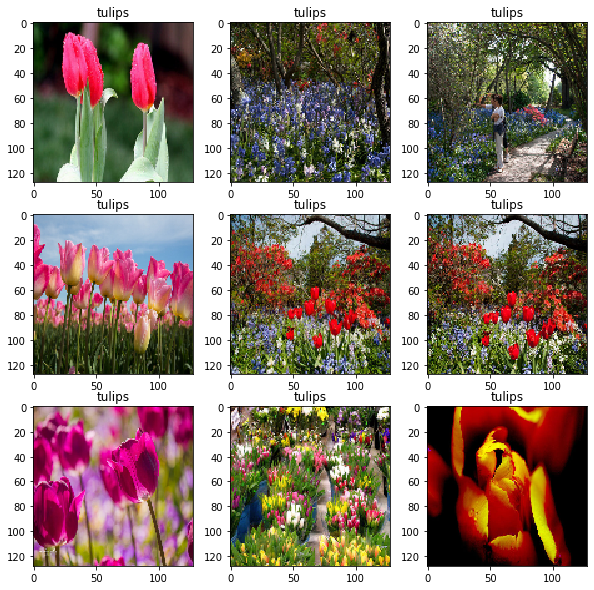

In [5]:
for i in range(5):
    start = i*9
    end = i*9+9
    fig, ax = plt.subplots(3,3, figsize=(10,10))
    for index, tup in enumerate(image_list_for_plot[start:end]):
        col = (index) % 3
        row = (index) // 3
        ax[row,col].imshow(tup[1])
        ax[row,col].set_title(tup[0])
plt.show()

In [6]:
# Delete redundant folders (if any)
if flower_dict.get(5) != None:
    flower_dict.pop(5)
print(flower_dict)

{0: 'daisy', 1: 'dandelion', 2: 'roses', 3: 'sunflowers', 4: 'tulips'}


### Data set processing

Split the data set, where the data set used for validation is 0.2, and the random seed is set to 785 (because it has to be compared with the effect of the model later)

**input**: data and label

**output**: x_train, x_val, y_train, y_val, request normalization of x_train, x_val

**Hint**: you can use train_test_split method, the maximum value of an image is 255

In [7]:
#Split data set
(x_train, x_val, y_train, y_val) = train_test_split(data, label, test_size=0.20, random_state=seed)

# Normalize
x_train = x_train / 255
x_val = x_val / 255

### Network building

Use Sequential model to build a convolutional neural network

The architecture requirements are as follows.
1. convolutional layer, 32 kernels, kernel_size 5\*5, padding = 'same', activation function using sigmoid
- maximum pooling layer, pool_size = [2, 2], strides = 2, padding = 'same'
- dropout, randomly discard 25% of neurons
- Convolutional layer, 64 kernels, kernel_size 3\*3, padding = 'same', activation function using sigmoid
- Convolutional layer, 64 kernels, kernel_size 3\*3, padding = 'same', activation function uses sigmoid
- maximum pooling layer, pool_size=[2, 2], strides =2, padding = 'same'
- dropout, dropout 25% of neurons at random
- Maximum pooling layer, 128 kernels, kernel_size 3\*3, padding = 'same', activation function using sigmoid
- max pooling layer, pool_size=[2, 2], strides =2, padding = 'same'
- dropout, drop out 25% of neurons at random
- flatten, transform feature maps into vectors
- fully-connected layer, 512 neurons, sigmoid for activation function
- fully connected layer, 256 neurons, sigmoid for the activation function
- Fully connected layer (output layer), 5 neurons, activation function using softmax

**Input**: None

**Output**: model

**Hint**.
1. the first convolutional layer, must contain the parameter 'input_shape', its value is (w,h,c)
- Conv2D,Layers.MaxPool2D can be used

In [8]:
model = Sequential([ 
    layers.Conv2D(32, kernel_size=[5, 5], padding="same", activation='sigmoid',input_shape=(w,h,c)),
    layers.MaxPool2D(pool_size=[2, 2], strides=2, padding='same'),
    layers.Dropout(0.25),

    layers.Conv2D(64, kernel_size=[3, 3], padding="same", activation='sigmoid'),
    layers.Conv2D(64, kernel_size=[3, 3], padding="same", activation='sigmoid'),
    layers.MaxPool2D(pool_size=[2, 2], strides=2, padding='same'),
    layers.Dropout(0.25),

    layers.Conv2D(128, kernel_size=[3, 3], padding="same", activation='sigmoid'),
    layers.MaxPool2D(pool_size=[2, 2], strides=2, padding='same'),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    layers.Dense(512, activation='sigmoid'),
    layers.Dense(256, activation='sigmoid'),
    layers.Dense(5, activation='softmax')
    ])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Building backward optimization and evaluation mechanisms

Construct loss function, optimizer and metrics
1. the optimizer uses a stochastic gradient descent algorithm with a learning rate of 0.01
2. the loss function is 'sparse_categorical_crossentropy'
3. using accuracy as the evaluation metric
4. use model.summary() to show the structure of the overall network and the number of parameters

**Input**: model

**output**: model with reverse optimization and evaluation mechanism

**Hint**: you can use the model.compilie method

In [9]:
# Use SGD optimizer to optimize the model parameters, lr is learning rate
opt = optimizers.SGD(lr=0.01)
model.compile(optimizer=opt, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# output the structure and number of parameters of the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 64)        0         
__________